## ODE Solution to 2-reaction network 

Simplified Chemical Reaction Network (CRN) of example introduced in [1]. Bees behaviour is modeled by 2 reactions:
- Stinging: Bee + P $\xrightarrow{k_1}$ BeeD + 2P 
- Pheromone degradation: P $\xrightarrow{k_2} \varnothing $  

The following ODEs are inferred from this model, satisfying the initial state $[Bee(0),BeeD(0),P(0)]$:   

$\frac{d}{dt}Bee(t) =  -1 k_1 ~ Bee(t) ~ P(t)$  
$\frac{d}{dt}BeeD(t)  = 1 k_1 ~ Bee(t) ~ P(t)$  
$\frac{d}{dt}P(t) =  1 k_1 ~ Bee(t) ~ P(t) - 1 k_2 ~ P(t)$  

This code computes a solution to the ODE system with reaction rates $k_1=k_2=1$ and the initial state $[1, 0, 1]$.

Stochastic:
0.162639
0.8373609999999999
0.0
Steady-state solution:  [1.58594378e-01 8.41405622e-01 1.03822300e-07]


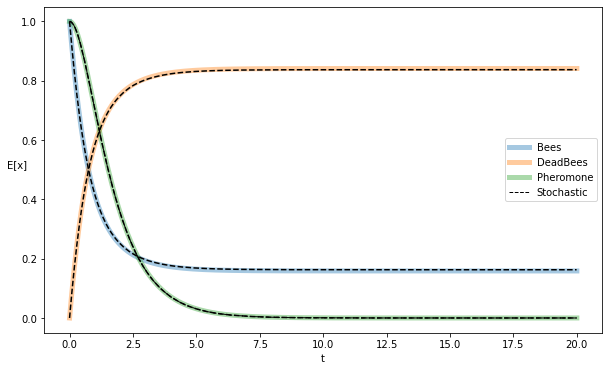

In [45]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pickle
          

# define system of ODEs with 2 reactions
def bees(y, t, k1, k2):
    bee, dead, p = y
    dydt = [-k1*bee*p, k1*bee*p, ((k1*bee*p) - (k2*p))]
    return dydt
          
# reaction rates
k1 = 1
k2 = 1

# initial condition
y0 = [1, 0, 1]

# solution for time interval between 0 and 20
t = np.linspace(0,20,2001)
sol = odeint(bees, y0, t, args=(k1, k2))

# plot ODE solution
fig = plt.figure(figsize=(10,6))
plt.plot(t, sol[:, 0], 'C0', alpha=0.4, lw=5, label='Bees')
plt.plot(t, sol[:, 1], 'C1', alpha=0.4, lw=5, label='DeadBees')
plt.plot(t, sol[:, 2], 'C2', alpha=0.4, lw=5, label='Pheromone')
plt.xlabel('t')
plt.ylabel('E[x]', rotation=0)

# read stochastic simulation data of 10000 trajectories of CRN
print('Stochastic:')
for i in np.arange(1,4,1):
    obj = pickle.load(open(f'../data/stochnet_stochODE/avg_{i}.pickle','rb'))
    plt.plot(np.arange(0,20,0.01), obj, '--', c='black', lw=1.5)
    print(obj[-1])
plt.plot(np.arange(0,20,0.01), obj, '--', c='black', lw=1, label='Stochastic')
plt.legend(loc='best')
fig.savefig('../figures/ODE/meanAndODE.png', dpi=300)


print('Steady-state solution: ', sol[-1])

## References

[1] Denis Repin, Nhat-Huy Phung, and Tatjana Petrov. StochNetV2: A Tool forAutomated Deep Abstractions for Stochastic Reaction Networks. pages 27–32.Springer, 2020.